In [4]:
import pandas as pd
from mlxtend.frequent_patterns import association_rules,apriori

In [5]:
df=pd.read_csv('my_movies.csv')

In [13]:
df1=df.drop(['V1','V2','V3','V4','V5'],axis=1)
df1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [55]:
frequent=apriori(df1,min_support=0.5,use_colnames=True)
frequent

C:\Users\Prathyusha\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.6,"(Patriot, Gladiator)"


In [56]:
result=association_rules(frequent,metric='confidence',min_threshold=0.6)
result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000


In [57]:
result.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333


In [58]:
lift=result[result.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000


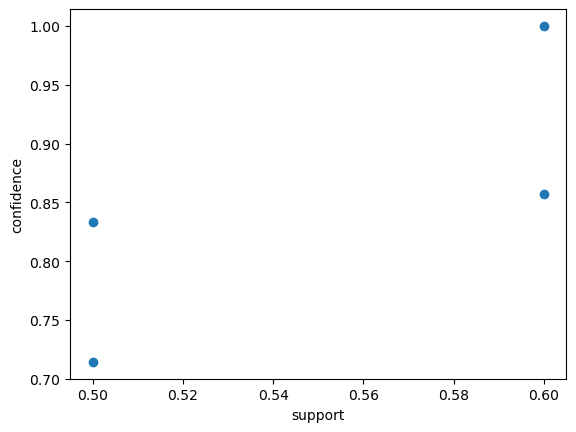

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(lift['support'], lift['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

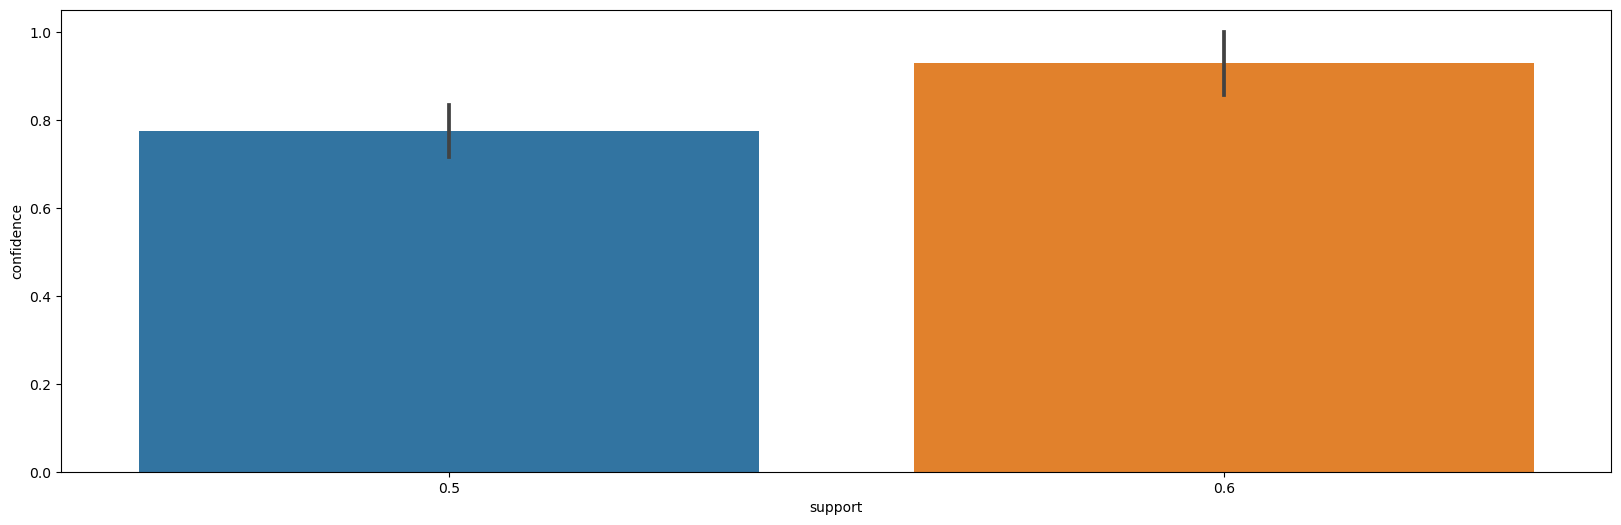

In [60]:
plt.figure(figsize=(20,6))
sns.barplot(x=lift['support'],y=lift['confidence'])
plt.show()

In [61]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

C:\Users\Prathyusha\AppData\Local\Temp\ipykernel_25452\3545437843.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = lift.pivot('antecedents','consequents','lift')


consequents,(Gladiator),(Sixth Sense),(Patriot)
antecedents,,,
(Sixth Sense),1.190476,NaN,NaN
(Gladiator),NaN,1.190476,1.428571
(Patriot),1.428571,NaN,NaN


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, "frozenset({'Gladiator'})"),
  Text(1.5, 0, "frozenset({'Sixth Sense'})"),
  Text(2.5, 0, "frozenset({'Patriot'})")])

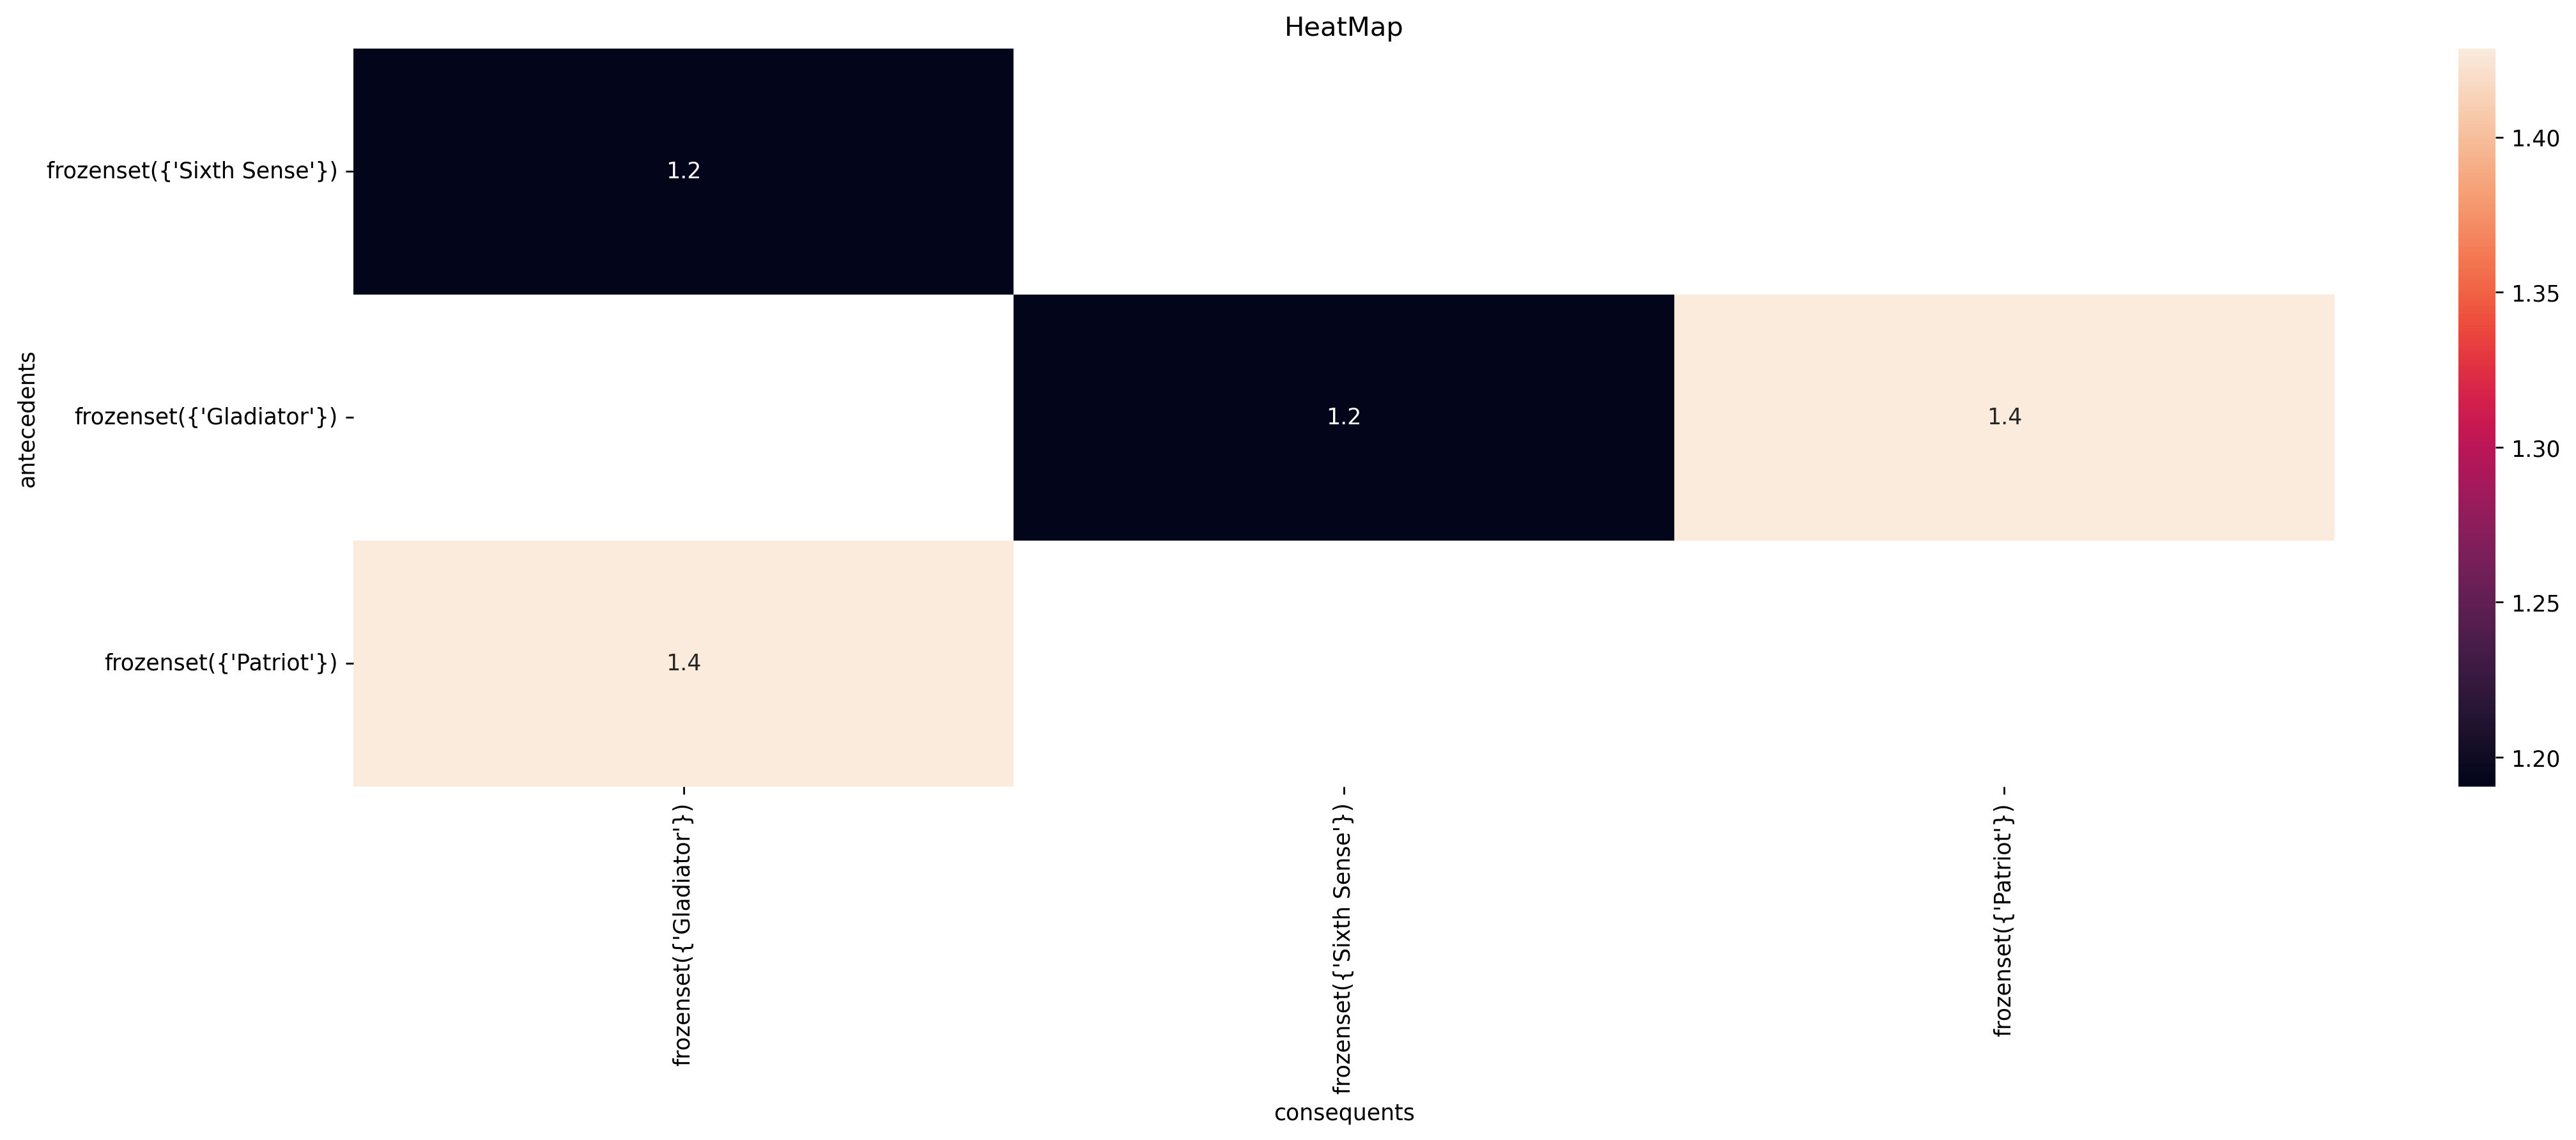

In [62]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

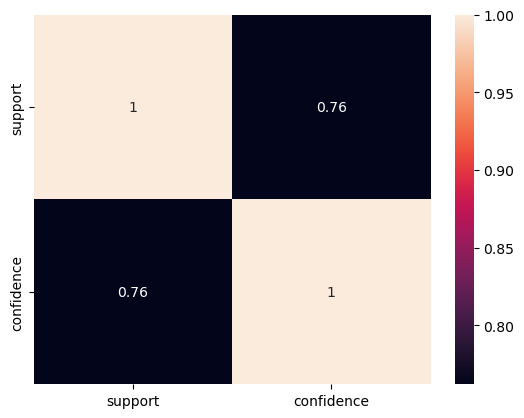

In [63]:
lift[['support','confidence']].corr()
sns.heatmap(lift[['support','confidence']].corr(),annot= True)
plt.show()

In [64]:
frequent2=apriori(df1,min_support=0.05,use_colnames=True)
frequent2

C:\Users\Prathyusha\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [65]:
result1=association_rules(frequent2,metric='confidence',min_threshold=0.5)
result1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
211,"(LOTR2, LOTR1)","(Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
212,(Harry Potter1),"(LOTR2, Sixth Sense, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
213,(Green Mile),"(Harry Potter1, LOTR2, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(LOTR1),"(Harry Potter1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [71]:
result1.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
125,"(Harry Potter1, LOTR2)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
180,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
168,"(LOTR2, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
115,"(Sixth Sense, LOTR)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
116,"(Green Mile, Gladiator)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
6,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
13,(Green Mile),(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6,-0.333333


In [75]:
lift1=result1[result1.lift>1]

In [76]:
lift1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
211,"(LOTR2, LOTR1)","(Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
212,(Harry Potter1),"(LOTR2, Sixth Sense, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
213,(Green Mile),"(Harry Potter1, LOTR2, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(LOTR1),"(Harry Potter1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


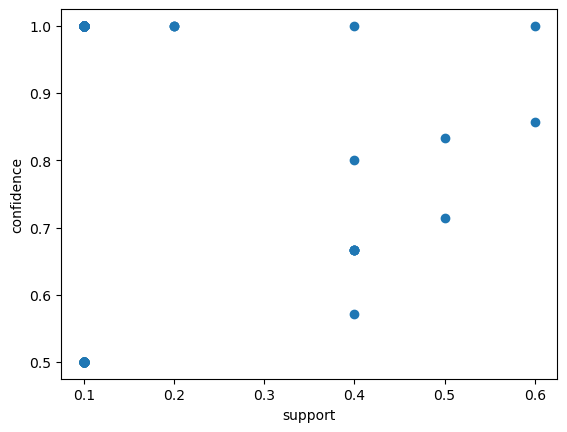

In [79]:
plt.scatter(lift1['support'],lift1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

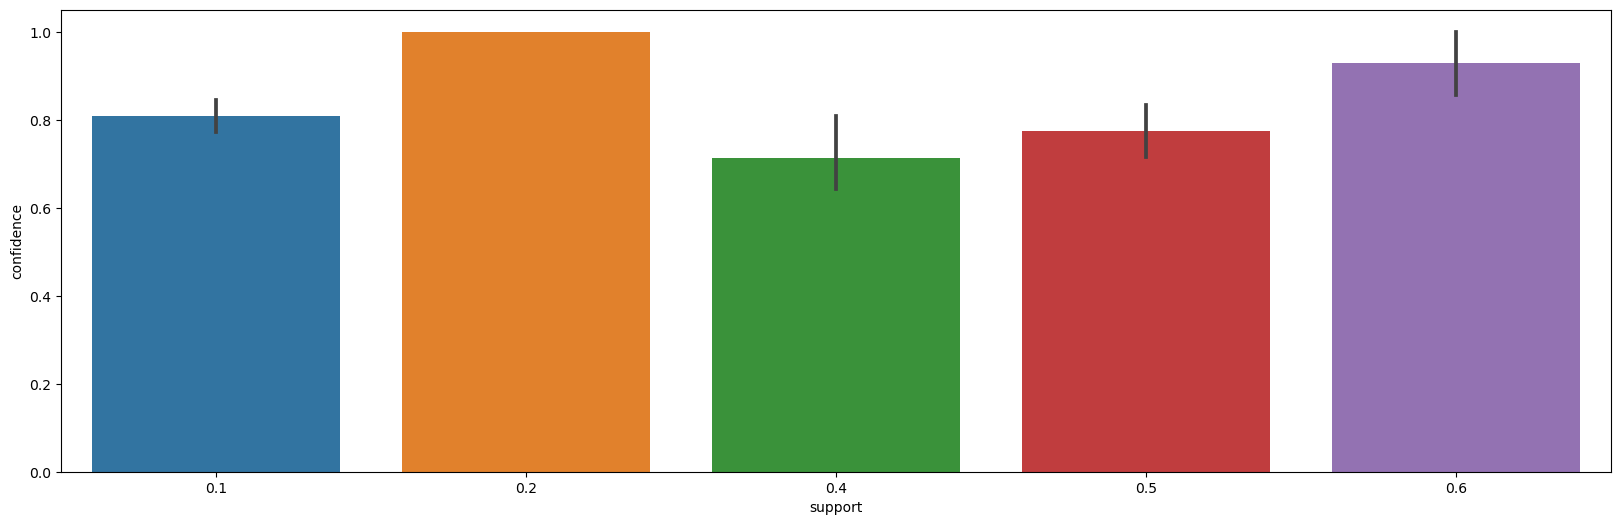

In [80]:
plt.figure(figsize=(20,6))
sns.barplot(x=lift1['support'],y=lift1['confidence'])
plt.show()